In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
from pandas.plotting import lag_plot



In [2]:
df = pd.read_excel("Data\Events_2014_2019.xlsx")

### Some descriptive statistics

FATO  DATA FATO
ANO  MES                  
2014 1    Furto       1496
     1    Roubo       1021
     2    Furto       1450
     2    Roubo       1126
     3    Furto       1705

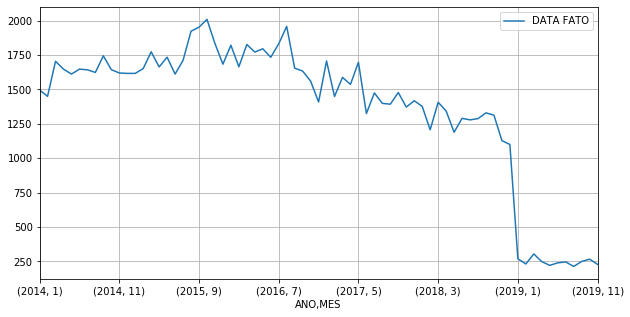

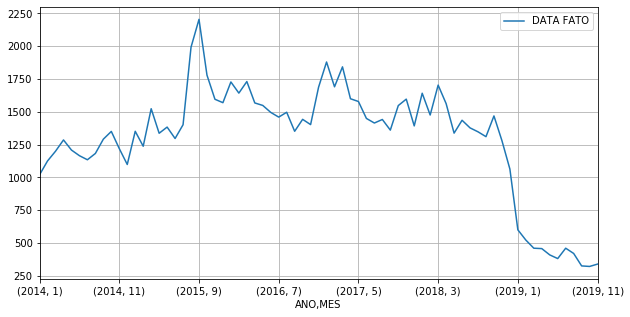

In [3]:
df['ANO'] = df['DATA FATO'].dt.year
df['MES'] = df['DATA FATO'].dt.month
df['FATO'] = df['FATO'].apply(lambda x: 'Roubo' if x == "ROUBO DE VEICULO" else ('Furto' if x == 'FURTO DE VEICULO' else x))
df['LOCAL FATO'] = df['LOCAL FATO'].apply(lambda x: 'PORTO ALEGRE' if x == "PORTO ALEGRE RS" else x)

dfTemp = df[['DATA FATO','ANO','MES','FATO']].groupby(['ANO', 'MES','FATO']).agg({'DATA FATO': 'count'})

dfTemp = dfTemp.reset_index().set_index(['ANO','MES'])
display(dfTemp.head())
dfTemp[dfTemp['FATO']=='Furto'].plot(figsize=(10,5), grid=True)
dfTemp[dfTemp['FATO']=='Roubo'].plot(figsize=(10,5), grid=True)

In [4]:
df_roubo = df[df['FATO'] == 'Roubo']
df_roubo = df_roubo[['DATA FATO', 'FATO']].groupby('DATA FATO').count().reset_index().rename(columns={'DATA FATO': 'DATE','FATO': 'OCCURRENCE'})

### Datetime feature engineering

In [5]:
df_roubo['year'] = df_roubo['DATE'].map(lambda x: x.year)
df_roubo['month'] = df_roubo['DATE'].map(lambda x: x.month)
df_roubo['day_week'] = df_roubo['DATE'].map(lambda x: x.dayofweek)
df_roubo['quarter'] = df_roubo['DATE'].map(lambda x: x.quarter)
df_roubo['week'] = df_roubo['DATE'].map(lambda x: x.week)
df_roubo['quarter_start'] = df_roubo['DATE'].map(lambda x: x.is_quarter_start)
df_roubo['quarter_end'] = df_roubo['DATE'].map(lambda x: x.is_quarter_end)
df_roubo['month_start'] = df_roubo['DATE'].map(lambda x: x.is_month_start)
df_roubo['month_end'] = df_roubo['DATE'].map(lambda x: x.is_month_end)
df_roubo['year_start'] = df_roubo['DATE'].map(lambda x: x.is_year_start)
df_roubo['year_end'] = df_roubo['DATE'].map(lambda x: x.is_year_end)
df_roubo['week_year'] = df_roubo['DATE'].map(lambda x: x.weekofyear)
df_roubo['day_month'] = df_roubo['DATE'].map(lambda x: x.daysinmonth)

df_roubo['quarter_start'] = df_roubo['quarter_start'].astype(int)
df_roubo['quarter_end'] = df_roubo['quarter_end'].astype(int)
df_roubo['month_start'] = df_roubo['month_start'].astype(int)
df_roubo['month_end'] = df_roubo['month_end'].astype(int)
df_roubo['year_start'] = df_roubo['year_start'].astype(int)
df_roubo['year_end'] = df_roubo['year_end'].astype(int)

#Check if it is weekday or weekend
df_roubo['weekend'] = df_roubo['day_week'].map(lambda x: 0 if x in list(range(0,5)) else 1)

#Check if it is second semester or not
df_roubo['half_year'] = df_roubo['month'].map(lambda x: 1 if x in list(range(7,13)) else 0)

In [6]:
df_roubo.head()

,DATE,OCCURRENCE,year,month,day_week,quarter,week,quarter_start,quarter_end,month_start,month_end,year_start,year_end,week_year,day_month,weekend,half_year
0,2014-01-01,7,2014,1,2,1,1,1,0,1,0,1,0,1,31,0,0
1,2014-01-02,30,2014,1,3,1,1,0,0,0,0,0,0,1,31,0,0
2,2014-01-03,29,2014,1,4,1,1,0,0,0,0,0,0,1,31,0,0
3,2014-01-04,31,2014,1,5,1,1,0,0,0,0,0,0,1,31,1,0
4,2014-01-05,26,2014,1,6,1,1,0,0,0,0,0,0,1,31,1,0


### Occurrences by winter and summer

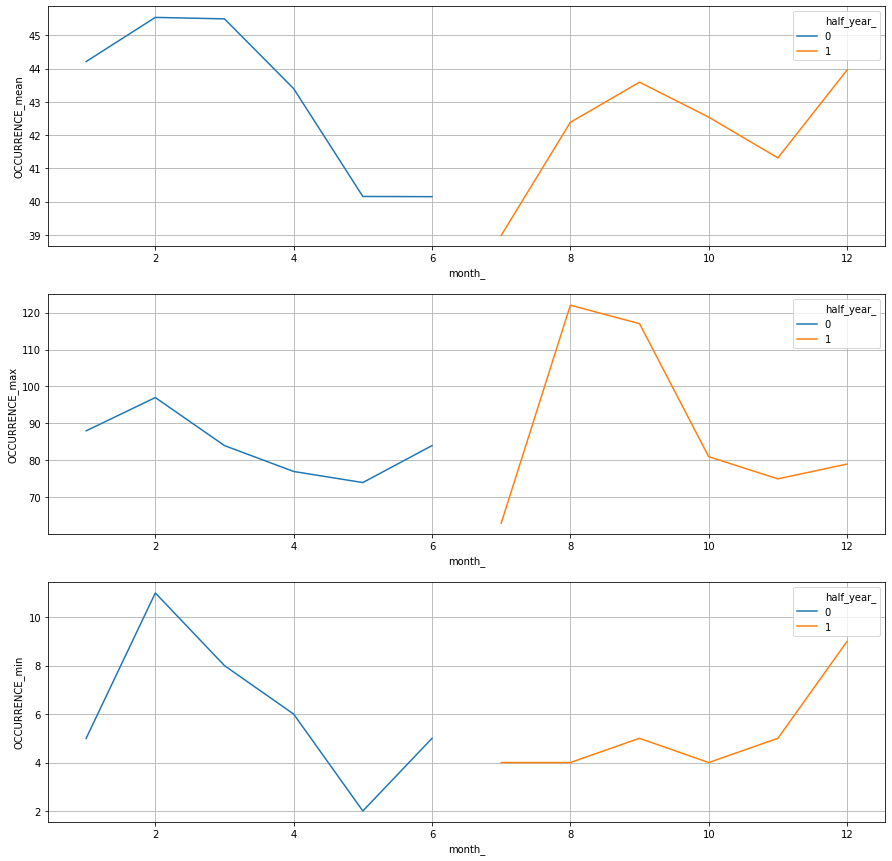

In [7]:
dfTemp = df_roubo[['month','half_year','OCCURRENCE']].groupby(['month','half_year']).agg({'OCCURRENCE':['mean','max','min']}).reset_index()
dfTemp.columns = dfTemp.columns.map('_'.join)

f, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.lineplot(x='month_', y='OCCURRENCE_mean', hue='half_year_', data=dfTemp,  ax=axes[0]);
axes[0].grid()
sns.lineplot(x='month_', y='OCCURRENCE_max', hue='half_year_', data=dfTemp,  ax=axes[1])
axes[1].grid()
sns.lineplot(x='month_', y='OCCURRENCE_min', hue='half_year_', data=dfTemp,  ax=axes[2])
axes[2].grid();


### Average number of occurrences by days of week

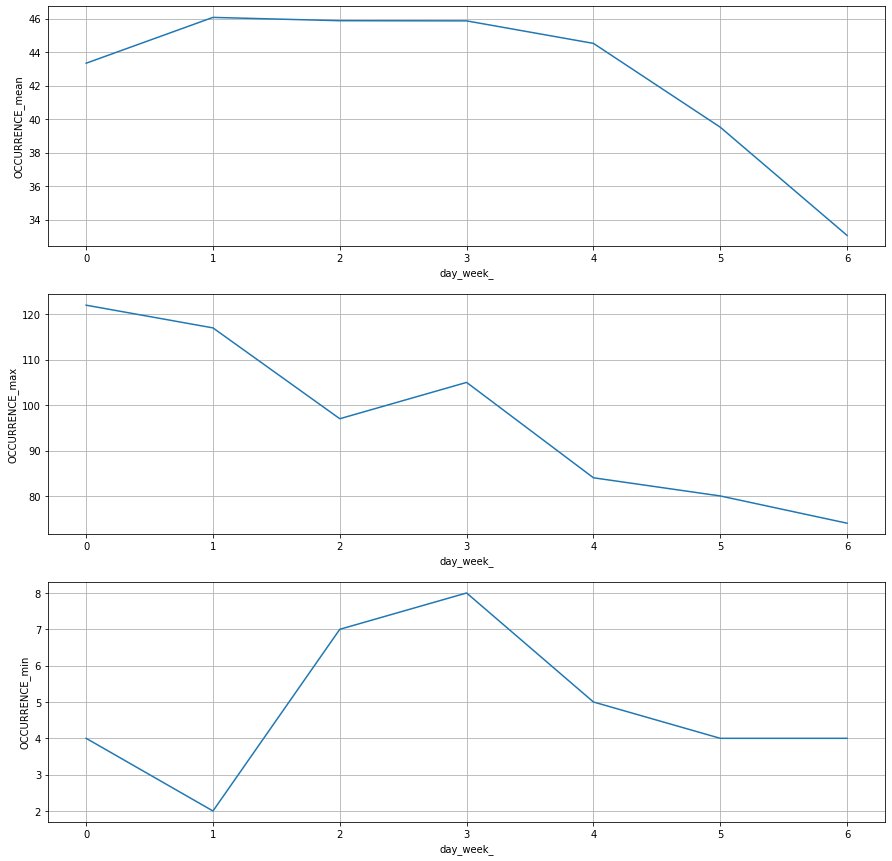

In [8]:
dfTemp = df_roubo[['day_week','OCCURRENCE']].groupby(['day_week']).agg({'OCCURRENCE':['mean','max','min']}).reset_index()
dfTemp.columns = dfTemp.columns.map('_'.join)

f, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.lineplot(x='day_week_', y='OCCURRENCE_mean', data=dfTemp,  ax=axes[0]);
axes[0].grid()
sns.lineplot(x='day_week_', y='OCCURRENCE_max',  data=dfTemp,  ax=axes[1])
axes[1].grid()
sns.lineplot(x='day_week_', y='OCCURRENCE_min',  data=dfTemp,  ax=axes[2])
axes[2].grid();

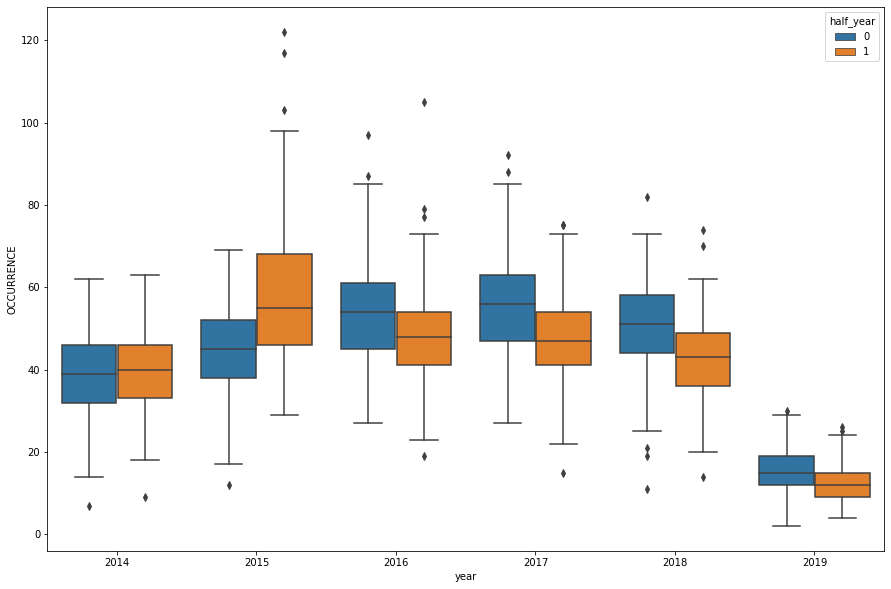

In [9]:
dfTemp = df_roubo[['year','half_year','OCCURRENCE']]

f, axes = plt.subplots(figsize=(15, 10))
sns.boxplot(x='year', y='OCCURRENCE', data=dfTemp, hue='half_year', ax=axes);


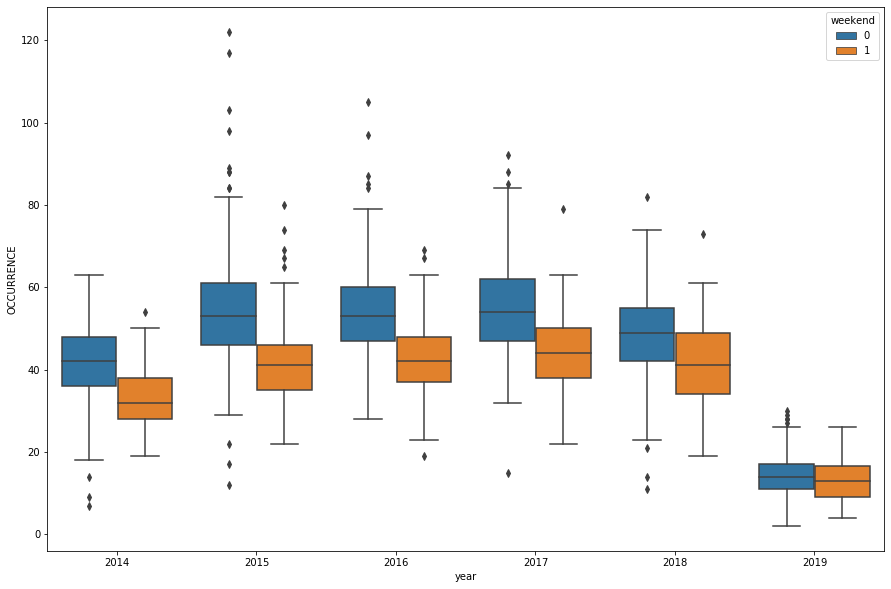

In [10]:
dfTemp = df_roubo[['year','weekend','OCCURRENCE']]

f, axes = plt.subplots(figsize=(15, 10))
sns.boxplot(x='year', y='OCCURRENCE', data=dfTemp, hue='weekend', ax=axes);

### Autocorrelation Analysis

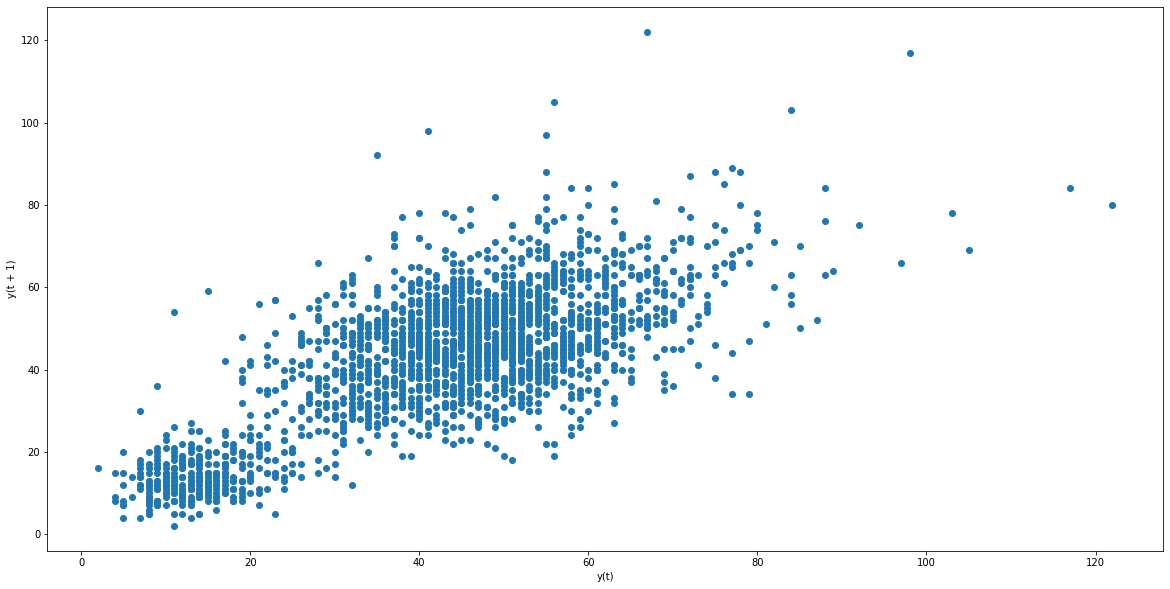

In [11]:
dfTemp=df_roubo[['DATE','OCCURRENCE']].set_index('DATE')
fig, ax = plt.subplots(figsize=(20, 10))
lag_plot(dfTemp, ax=ax)
plt.show()

The analysis and models that are presented in this notebook were based on the following references: 

https://medium.com/@abhikjha/predicting-sensex-48f4afb900b5
https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/